In [1]:
%load_ext line_profiler
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import old.tools, old.RNTK_avg
import jax
import symjax
import symjax.tensor as T
import copy
import time
import json
import matplotlib.pyplot as plt

from RNTK_onediag_dual import RNTK
from RNTK_onediag_dual import create_func as create_func_dual

In [3]:
import re

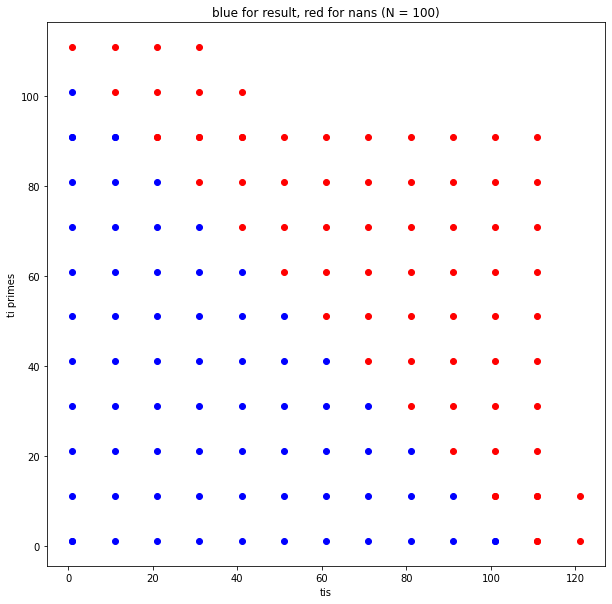

In [23]:
with open("timings.txt", "r") as file:
    mlines = file.readlines()
listofres = [{"ti":int((res := re.search("\"(?P<ti>[0-9]*),(?P<tip>[0-9]*)\": (?P<z>[0-1])\\n", i)).group("ti")), "tip": int(res.group("tip")), "z": int(res.group("z"))} for i in mlines[1:-1:2]]

fig, ax = plt.subplots(figsize = (10, 10))
ax.set_xlabel("tis")
ax.set_ylabel("ti primes")
ax.set_title("blue for result, red for nans (N = 100)")
for res in listofres:
    # print(res)
    ax.plot(res["ti"], res["tip"], ('bo', 'ro')[bool(res["z"])])

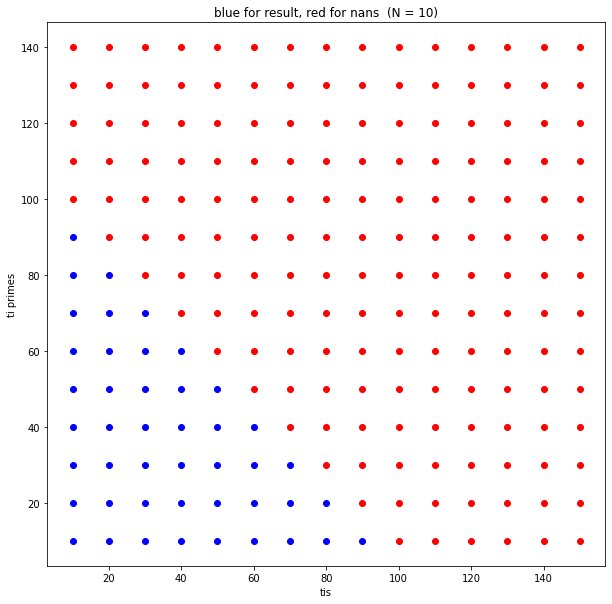

In [24]:
with open("timings10.txt", "r") as file:
    mlines = file.readlines()
listofres = [{"ti":int((res := re.search("\"(?P<ti>[0-9]*),(?P<tip>[0-9]*)\": (?P<z>[0-1])\\n", i)).group("ti")), "tip": int(res.group("tip")), "z": int(res.group("z"))} for i in mlines[1:-1:2]]

fig, ax = plt.subplots(figsize = (10, 10))
ax.set_xlabel("tis")
ax.set_ylabel("ti primes")
ax.set_title("blue for result, red for nans  (N = 10)")
for res in listofres:
    # print(res)
    ax.plot(res["ti"], res["tip"], ('bo', 'ro')[bool(res["z"])])

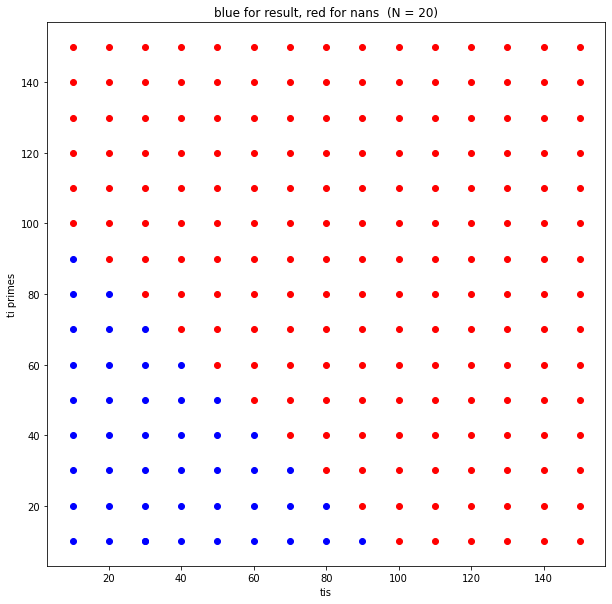

In [27]:
with open("timings20.txt", "r") as file:
    mlines = file.readlines()
listofres = [{"ti":int((res := re.search("\"(?P<ti>[0-9]*),(?P<tip>[0-9]*)\": (?P<z>[0-1])\\n", i)).group("ti")), "tip": int(res.group("tip")), "z": int(res.group("z"))} for i in mlines[1:-1:2]]

fig, ax = plt.subplots(figsize = (10, 10))
ax.set_xlabel("tis")
ax.set_ylabel("ti primes")
ax.set_title("blue for result, red for nans  (N = 20)")
for res in listofres:
    # print(res)
    ax.plot(res["ti"], res["tip"], ('bo', 'ro')[bool(res["z"])])

In [5]:
# get old vt for the first algorithm

In [12]:
dic = {}
dic["n_patrons1="] = 10#00 #// N (what affect symjax time)
dic["n_entradasTiP="] = 60#00 #// TiPrime length
dic["n_entradasTi="] = 50#00 #// Ti length (multiplier on symjax time)
N = int(dic["n_patrons1="])
ti_length = int(dic["n_entradasTi="])
ti_prime_length = int(dic["n_entradasTiP="])
DATA = T.Placeholder((N, ti_length), 'float32', name = "X")
DATAT = T.transpose(DATA)
#testing
DATA_NP = np.zeros((N, ti_length))
DATA_PRIME_NP = np.zeros((N, ti_prime_length))
DATA_NP_T = np.transpose(DATA_NP)


In [13]:
rntk = RNTK(dic, DATA_NP, DATA_PRIME_NP, False)

In [14]:
rntk.dim_lengths

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 51.,
       51., 51., 51., 51., 51., 51., 51., 51., 51., 50., 49., 48., 47.,
       46., 45., 44., 43., 42., 41., 40., 39., 38., 37., 36., 35., 34.,
       33., 32., 31., 30., 29., 28., 27., 26., 25., 24., 23., 22., 21.,
       20., 19., 18., 17., 16., 15., 14., 13., 12., 11., 10.,  9.,  8.,
        7.,  6.,  5.,  4.,  3.,  2.,  1.])